## 找尋資料中心

In [5]:
temp = [23,25,26,17,19,20,22,27,28]
sum(temp)
len(temp)

sum(temp) / len(temp)

23.0

In [6]:
temp1 = [23,25,26,17,19,20,22,27,28, 999 , 999 ]
sum(temp1) / len(temp1)

200.45454545454547

In [10]:
temp1 = [23,25,26,17,19,20,22,27,28, 999, 999 ]
temp1.sort()
temp1

[17, 19, 20, 22, 23, 25, 26, 27, 28, 999, 999]

In [11]:
temp1[5]

25

In [13]:
from collections import Counter
c = Counter(temp1)
c.most_common(3)

[(999, 2), (17, 1), (19, 1)]

## 使用Pandas 找出資料中心

In [14]:
import pandas
tw2330 = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/pyfintech/master/tw2330.csv', na_values='null', parse_dates={'Dates':[0]})

In [15]:
tw2330.head()

,Dates,Open,High,Low,Close,Volume,Adj Close
0,2016-07-21,171.0,172.0,170.0,172.0,33130000,172.0
1,2016-07-20,170.0,170.5,169.0,170.0,38053000,170.0
2,2016-07-19,170.5,170.5,169.0,170.5,42456000,170.5
3,2016-07-18,168.0,170.0,168.0,169.5,24749000,169.5
4,2016-07-15,169.5,169.5,169.5,169.5,41000,169.5


In [17]:
tw2330['Close'].mean()

75.93924959016354

In [18]:
tw2330['Close'].median()

63.0236

## 量測IQR

In [19]:
temp1 = [23,25,26,17,19,20,22,27,28, 999, 999 ]
temp1.sort()
temp1

[17, 19, 20, 22, 23, 25, 26, 27, 28, 999, 999]

In [22]:
temp1[5]

25

In [24]:
quarter1 = (20 + 22) / 2
quarter1

21.0

In [27]:
quarter3 = (27 + 28) / 2
quarter3

27.5

In [32]:
IQR = quarter3 - quarter1
IQR

6.5

## 量測IQR (使用Pandas)

In [34]:
tw2330['Close'].median()

63.0236

In [35]:
tw2330['Close'].quantile(0.75)

88.47500000000001

In [37]:
tw2330['Close'].quantile(0.5)

63.0236

In [38]:
tw2330['Close'].quantile(0.25)

54.860425

In [39]:
IQR = tw2330['Close'].quantile(0.75) - tw2330['Close'].quantile(0.25)
IQR

33.61457500000001

Populating the interactive namespace from numpy and matplotlib


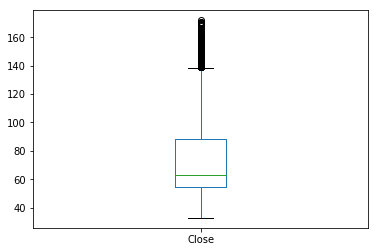

In [40]:
%pylab inline
tw2330['Close'].plot(kind = 'box')

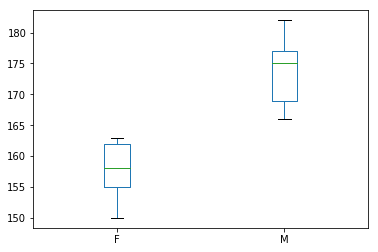

In [46]:
df = pandas.DataFrame([[150,166], [155, 182], [163, 175], [158, 177], [162, 169]])
df.columns = ['F', 'M']
df.plot(kind = 'box')

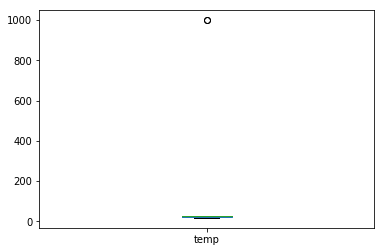

In [50]:
tempdf = pandas.DataFrame([23,25,26,17,19,20,22,27,28, 999, 999 ])
tempdf.columns = ['temp']
tempdf.plot(kind = 'box')

Populating the interactive namespace from numpy and matplotlib


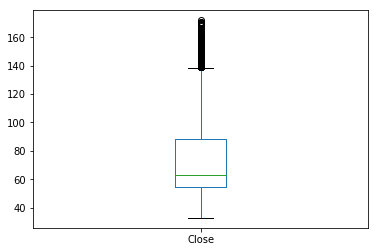

In [53]:
%pylab inline
tw2330['Close'].plot(kind = 'box')

Populating the interactive namespace from numpy and matplotlib


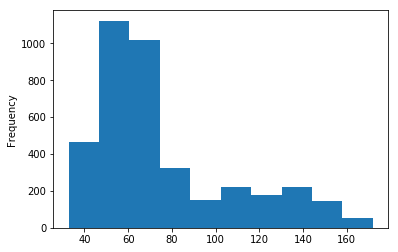

In [54]:
%pylab inline
tw2330['Close'].plot(kind = 'hist')

## 標準差

In [58]:
X_avg = 30
X = [10,20,30,40,50]


In [59]:
abs(10 - 30) + abs(20 - 30) + abs(30 - 30) + abs(40 - 30) + abs(50 - 30)

60

In [65]:
import numpy
import math
X1     = numpy.array(X)
X1_avg = 30
math.sqrt(sum(((X1 - X1_avg) ** 2)) / (len(X1) - 1))

15.811388300841896

## 標準差 (使用Pandas)

In [69]:
tw2330['Close'].var()

1004.0219018810959

In [71]:
tw2330['Close'].std() * tw2330['Close'].std()

1004.0219018810959

## 資料分布

Populating the interactive namespace from numpy and matplotlib


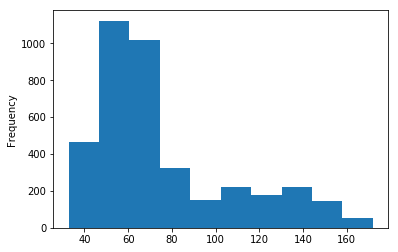

In [72]:
%pylab inline
tw2330['Close'].plot(kind = 'hist')

In [78]:
tw2330['DailyReturn'] = tw2330['Close'].pct_change(1)

In [85]:
tw2330['DailyReturn2'] =  (tw2330['Close'] / tw2330['Close'].shift(1)) - 1

Populating the interactive namespace from numpy and matplotlib


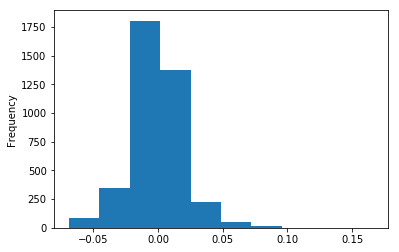

In [87]:
%pylab inline
tw2330['DailyReturn'].plot(kind = 'hist')

In [89]:
tw2330['DailyReturn'].mean()
tw2330['DailyReturn'].std()

0.020097776093334855

## 安裝 Pandas-DataReader

In [91]:
! pip install pandas-datareader

  Running setup.py bdist_wheel for requests-file: started
  Running setup.py bdist_wheel for requests-file: finished with status 'done'
  Stored in directory: C:\Users\Student\AppData\Local\pip\Cache\wheels\3e\34\3a\c2e634ca7b545510c1b3b7d94dea084e5fdb5f33558f3c3a81
  Running setup.py bdist_wheel for requests-ftp: started
  Running setup.py bdist_wheel for requests-ftp: finished with status 'done'
  Stored in directory: C:\Users\Student\AppData\Local\pip\Cache\wheels\76\fb\0d\1026eb562c34a4982dc9d39c9c582a734eefe7f0455f711deb
Successfully built requests-file requests-ftp


In [93]:
import pandas_datareader as pdr
#pdr.get_data_yahoo('AAPL')

In [95]:
import pandas_datareader as pdr
twii = pdr.get_data_yahoo('^TWII')
tw2330 = pdr.get_data_yahoo('2330.TW')

In [99]:
import pandas
result=pandas.merge(twii,tw2330,left_index=True,right_index=True,how='inner')

In [101]:
result[['Close_x','Close_y']].cov()

,Close_x,Close_y
Close_x,748112.535980,31636.479934
Close_y,31636.479934,2091.726074


In [103]:
result[['Close_x','Close_y']].corr()

,Close_x,Close_y
Close_x,1.000000,0.791137
Close_y,0.791137,1.000000


## 點估計

In [112]:
import pandas
tw2330 = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/pyfintech/master/tw2330.csv', na_values='null', parse_dates={'Dates':[0]})
tw2330['DailyReturn'] = tw2330['Close'].pct_change(1)

In [113]:
import numpy as np
np.random.seed(10)

In [114]:
sample_size = 100
sample      = np.random.choice(a=tw2330['DailyReturn'], size=sample_size)
sample_mean = sample.mean()

In [115]:
sample_mean

0.0046790036049509454

## 信賴區間

In [127]:
from scipy import stats
sz_critical=stats.norm.ppf(q=0.975)
sz_critical

1.959963984540054

In [128]:
from scipy import stats
z_critical=stats.norm.ppf(q=0.995)
z_critical

2.5758293035489004

In [129]:
pop_stdev=tw2330['DailyReturn'].std()

In [130]:
pop_stdev=tw2330['DailyReturn'].std()
margin_of_error= sz_critical* (pop_stdev / math.sqrt(sample_size))

In [132]:
sample_mean - margin_of_error, sample_mean + margin_of_error 

(0.00073991187372230306, 0.0086180953361795869)

## 假設檢定

In [133]:
from scipy import stats
one_sample_data=[15.48,4.4,5.81,6.07,5.19,3.25,4.41,5.05,11.63,8.99]
one_sample=stats.ttest_1samp(one_sample_data,8)
print(one_sample[1]/2)

0.22325177944


## Pandas 基礎

## 建立/讀取時間序列

In [135]:
from pandas import Series
labels = ['a', 'b', 'c', 'd', 'e']
s = Series([1, 2, 3, 4, 5], index=labels)
s

a    1
b    2
c    3
d    4
e    5
dtype: int64

In [137]:
'b' in s

True

In [138]:
s['b']

2

In [139]:
mapping = s.to_dict()

In [140]:
mapping

{'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5}

In [141]:
Series(mapping)

a    1
b    2
c    3
d    4
e    5
dtype: int64

## 從Yahoo 讀取資料

In [142]:
import pandas_datareader as pdr
tw2330 = pdr.get_data_yahoo('2330.TW')

In [143]:
tw2330.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,64.500000,65.000000,64.000000,64.900002,48.999027,39407000.0
2010-01-05,65.000000,65.099998,63.900002,64.500000,48.697025,37138000.0
2010-01-06,64.500000,64.900002,63.700001,64.900002,48.999027,49261000.0
2010-01-07,64.900002,65.000000,64.199997,64.199997,48.470528,42134000.0
2010-01-08,63.500000,64.300003,63.500000,64.000000,48.319534,46076000.0


In [145]:
type(tw2330)

pandas.core.frame.DataFrame

In [146]:
type(tw2330['Close'])

pandas.core.series.Series

In [148]:
tw2330['Close'].head()

Date
2010-01-04    64.900002
2010-01-05    64.500000
2010-01-06    64.900002
2010-01-07    64.199997
2010-01-08    64.000000
Name: Close, dtype: float64

In [151]:
tw2330['Close'][0:10]

Date
2010-01-04    64.900002
2010-01-05    64.500000
2010-01-06    64.900002
2010-01-07    64.199997
2010-01-08    64.000000
2010-01-11    64.500000
2010-01-12    63.599998
2010-01-13    62.799999
2010-01-14    63.200001
2010-01-15    63.500000
Name: Close, dtype: float64

In [152]:
tw2330['Close'][-10:]

Date
2017-10-03    222.5
2017-10-05    224.5
2017-10-06    224.5
2017-10-11    233.0
2017-10-12    237.5
2017-10-13    237.5
2017-10-16    238.0
2017-10-17    235.5
2017-10-18    237.5
2017-10-19    240.5
Name: Close, dtype: float64

In [156]:
ts = tw2330['Close']
ts[0:6]

Date
2010-01-04    64.900002
2010-01-05    64.500000
2010-01-06    64.900002
2010-01-07    64.199997
2010-01-08    64.000000
2010-01-11    64.500000
Name: Close, dtype: float64

In [157]:
ts[5]

64.5

In [159]:
ts.index[5]

Timestamp('2010-01-11 00:00:00')

In [164]:
df = tw2330[['Open','Close']].head()
df

,Open,Close
Date,,
2010-01-04,64.500000,64.900002
2010-01-05,65.000000,64.500000
2010-01-06,64.500000,64.900002
2010-01-07,64.900002,64.199997
2010-01-08,63.500000,64.000000


In [165]:
type(df)

pandas.core.frame.DataFrame

In [166]:
df['Close'] - df['Open']

Date
2010-01-04    0.400002
2010-01-05   -0.500000
2010-01-06    0.400002
2010-01-07   -0.700005
2010-01-08    0.500000
dtype: float64

In [167]:
df['diff'] = df['Close'] - df['Open']

In [170]:
sum(df['diff'] > 0 )

3

In [173]:
sum(tw2330['Close'] - tw2330['Open'] > 0 ) / len(tw2330['Close'])

0.43087318087318088

In [174]:
df

,Open,Close,diff
Date,,,
2010-01-04,64.500000,64.900002,0.400002
2010-01-05,65.000000,64.500000,-0.500000
2010-01-06,64.500000,64.900002,0.400002
2010-01-07,64.900002,64.199997,-0.700005
2010-01-08,63.500000,64.000000,0.500000


In [175]:
del df['diff']

In [176]:
df

,Open,Close
Date,,
2010-01-04,64.500000,64.900002
2010-01-05,65.000000,64.500000
2010-01-06,64.500000,64.900002
2010-01-07,64.900002,64.199997
2010-01-08,63.500000,64.000000


## 常見金融計算

In [177]:
close_px = tw2330['Adj Close']

In [179]:
import pandas
mavg = close_px.rolling(window = 30).mean()

In [181]:
mavg.head()

Date
2010-01-04   NaN
2010-01-05   NaN
2010-01-06   NaN
2010-01-07   NaN
2010-01-08   NaN
Name: Adj Close, dtype: float64

In [182]:
rets = close_px / close_px.shift(1) - 1

In [187]:
rets.head()

Date
2010-01-04         NaN
2010-01-05   -0.006163
2010-01-06    0.006202
2010-01-07   -0.010786
2010-01-08   -0.003115
Name: Adj Close, dtype: float64

In [184]:
rets = close_px.pct_change(1)

In [186]:
rets.head()

Date
2010-01-04         NaN
2010-01-05   -0.006163
2010-01-06    0.006202
2010-01-07   -0.010786
2010-01-08   -0.003115
Name: Adj Close, dtype: float64

## 資料視覺化

Populating the interactive namespace from numpy and matplotlib


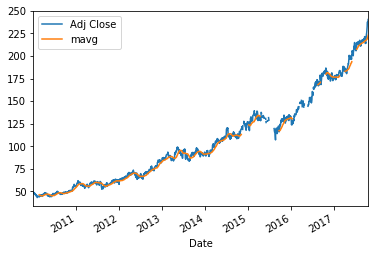

In [190]:
%pylab inline
close_px.plot(kind = 'line')
mavg.plot(label='mavg')
plt.legend()

## 計算股票關聯性

In [191]:
import pandas_datareader as pdr
stock = pdr.get_data_yahoo(['2330.TW', '2454.TW', '2498.TW', '3003.TW','1101.TW', '1102.TW'])['Close']

In [193]:
stock.head()

,1101.TW,1102.TW,2330.TW,2454.TW,2498.TW,3003.TW
Date,,,,,,
2017-10-19,33.700001,27.049999,240.0,319.0,70.599998,77.599998
2017-10-18,33.799999,27.100000,237.5,314.5,69.500000,70.599998
2017-10-17,33.900002,27.100000,235.5,321.0,69.800003,68.500000
2017-10-16,33.849998,27.150000,238.0,326.0,72.800003,69.900002
2017-10-13,33.750000,27.000000,237.5,322.0,73.099998,69.900002


In [194]:
rets = stock.pct_change()

In [195]:
rets.head()

,1101.TW,1102.TW,2330.TW,2454.TW,2498.TW,3003.TW
Date,,,,,,
2017-10-19,NaN,NaN,NaN,NaN,NaN,NaN
2017-10-18,0.002967,0.001848,-0.010417,-0.014107,-0.015581,-0.090206
2017-10-17,0.002959,0.000000,-0.008421,0.020668,0.004317,-0.029745
2017-10-16,-0.001475,0.001845,0.010616,0.015576,0.042980,0.020438
2017-10-13,-0.002954,-0.005525,-0.002101,-0.012270,0.004121,0.000000


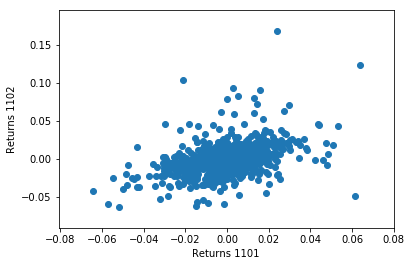

In [199]:
plt.scatter(rets['1101.TW'], rets['1102.TW'])
plt.xlabel('Returns 1101')
plt.ylabel('Returns 1102')

In [200]:
corr = rets.corr()
corr

,1101.TW,1102.TW,2330.TW,2454.TW,2498.TW,3003.TW
1101.TW,1.000000,0.420403,0.320279,0.211000,0.200798,0.233861
1102.TW,0.420403,1.000000,0.251002,0.143951,0.142835,0.099506
2330.TW,0.320279,0.251002,1.000000,0.318315,0.220291,0.209803
2454.TW,0.211000,0.143951,0.318315,1.000000,0.230236,0.177630
2498.TW,0.200798,0.142835,0.220291,0.230236,1.000000,0.236546
3003.TW,0.233861,0.099506,0.209803,0.177630,0.236546,1.000000


0
1
2
3
4
5


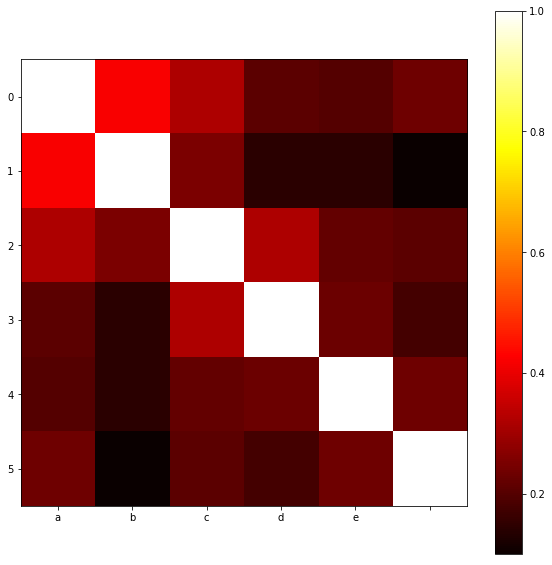

In [220]:
plt.figure(figsize=(10,10))
plt.imshow(corr, cmap='hot', interpolation='none')

plt.colorbar()
#plt.xticks(range(len(corr)), corr.columns)
#plt.yticks(range(len(corr)), corr.columns)
plt.xticks([0,1,2,3,4,5], ['a', 'b', 'c', 'd', 'e'])
for i in range(6):
    print(i)

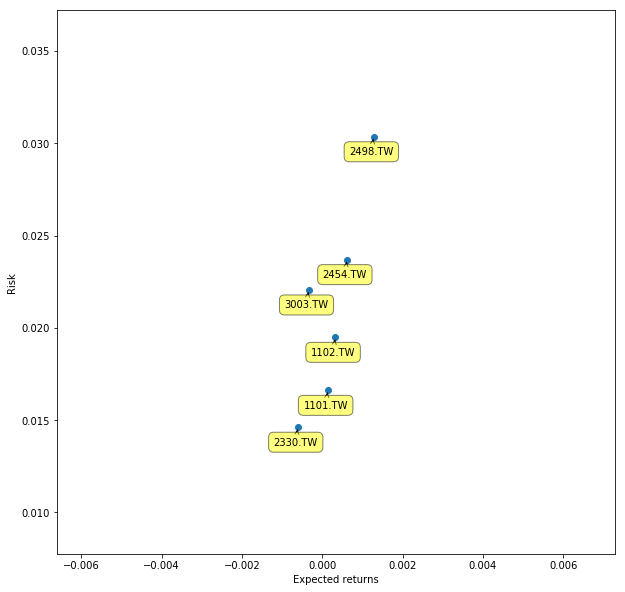

In [214]:
plt.figure(figsize=(10,10))
plt.scatter(rets.mean(), rets.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (20, -20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

## Machine Learning

In [222]:
from sklearn.datasets import load_iris

In [223]:
iris = load_iris()

In [229]:
print(iris['DESCR'])

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [232]:
iris.data[0:5]

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2]])

In [233]:
iris.target[0:5]

array([0, 0, 0, 0, 0])

In [237]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.fit(iris.data, iris.target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [239]:
clf.predict([[ 5,  3.8,  1.0,  0.5]])

array([0])